## Mapping the spiral arms

Last bit

#### Starting with the usual imports and some constants

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

R0 = 8.5 # kpc
V0 = 220 # Use your value here 
V = 250  # km/s 
KPC_M = 3.08567758e+19 # kiloparsec to metre conversion factor

#### Calculate R

$ R = V R_0 / [V_0 + (V_{obs}/\sin(l))]$

In [39]:
def calc_R(l, V_obs):
    R01=R0*KPC_M
    V01=220*1000
    V1=260*1000
    V_obs=V_obs*1000
    
    A=V1*R01
    B=V_obs/np.sin(np.radians(l))
    
    R=(A/(V01+B))/KPC_M
    
    return R
    

#### Calculate R1
$R_1=R_0\cos{l}-\sqrt{R^2-R_0^2\sin^2{l}}$


In [40]:
def calc_R1(l, R):
    
  
    l=np.radians(l)
    
    print(np.sin(l)**2)
        
    A=8.5*np.cos(l)
    B=(8.5**2)*(np.sin(l))**2
    C=R**2
    
    print(A)
    print(B)
    print(C)
    
    R1=np.absolute((A-np.sqrt((C-B))))
    
    print(R1)
    
    return R1

In [41]:
calc_R1(120,7.05)

0.7500000000000001
-4.249999999999998
54.18750000000001
49.7025
nan


<ipython-input-40-88f53baab4c5>:16: RuntimeWarning: invalid value encountered in sqrt
  R1=np.absolute((A-np.sqrt((C-B))))


nan

#### Read data into a dataframe



In [47]:
path_name = os.path.join(".\\results\\", "lsr.csv")

df = pd.read_csv(path_name, usecols=["longitude", "v_obs"],skipinitialspace = True)

df["R"]=calc_R(df["longitude"], df["v_obs"])

df["R1"]=calc_R1(df["longitude"], df["R"])

df.to_csv(os.path.join(".\\results\\", "lsr_big.csv"))


0     0.413176
1     0.413176
2     0.586824
3     0.586824
4     0.750000
5     0.750000
6     0.883022
7     0.883022
8     0.969846
9     0.750000
10    0.250000
11    0.750000
12    0.750000
13    0.883022
14    0.883022
15    0.969846
16    0.969846
17    1.000000
18    0.969846
19    0.969846
20    0.883022
21    0.883022
22    0.030154
23    0.116978
24    0.413176
25    0.586824
26    0.750000
27    0.883022
28    0.969846
29    1.000000
30    0.969846
31    0.883022
32    0.750000
33    0.586824
34    0.413176
35    0.586824
36    0.750000
37    0.883022
38    0.969846
39    1.000000
40    0.969846
41    0.883022
42    0.750000
43    0.586824
Name: longitude, dtype: float64
0     6.511378e+00
1     6.511378e+00
2     5.463695e+00
3     5.463695e+00
4     4.250000e+00
5     4.250000e+00
6     2.907171e+00
7     2.907171e+00
8     1.476010e+00
9    -4.250000e+00
10   -7.361216e+00
11    4.250000e+00
12    4.250000e+00
13    2.907171e+00
14    2.907171e+00
15    1.476010e+00
16  

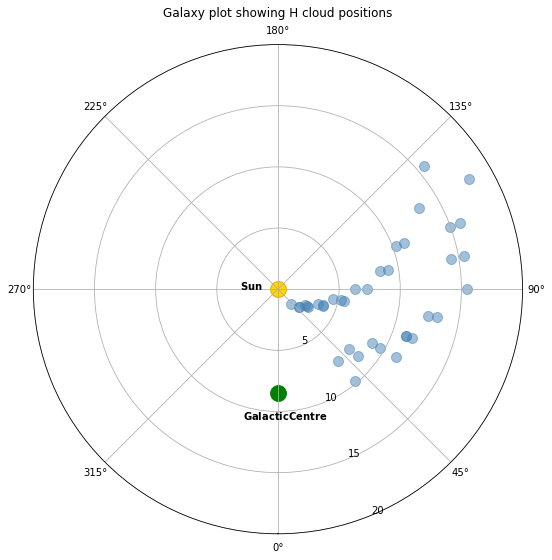

In [43]:
plt.rcParams["figure.figsize"] = [16,9]

cloud_thetas = df['longitude']*3.142/180
cloud_r = df['R1']  # Remember that you need to compute R1 first

ax = plt.subplot(111, projection = 'polar')
plt.scatter(cloud_thetas, cloud_r, label="Clouds", s=100, alpha=0.5, color="steelblue")
#plt.scatter(cloud_thetas, cloud_r, color="grey", label="Clouds", s=200, alpha=0.2)
plt.scatter(0,0, color="gold", s= 250, edgecolors="orange")
plt.scatter(0,8.5, color="green", s= 250, marker="o", label="Galctic Centre")
plt.title("Galaxy plot showing H cloud positions", va = 'bottom')
ax.set_theta_zero_location("S")
plt.yticks([5,10,15,20])
#plt.ylabel="kpc"
ax.set_rmax(20)
ax.set_rmin(0)
plt.text((3/2)*np.pi,np.pi, r"$\mathbf{Sun}$")
plt.text(np.radians(-15),11, r"$\mathbf{Galactic Centre}$")
#plt.text(np.radians(23),29, r"$\mathrm{/\;kpc}$")
plt.savefig(os.path.join(".\\results\\", "spiral_plot.png"))
plt.show()